In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [2]:
data = pd.read_csv("insurance.csv")

In [3]:
df= data.copy()

###   Basic Structure and Cleanliness Checks

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [5]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [6]:
df.shape

(986, 11)

###  Data Type Optimization

In [7]:

categorical_cols = [
    'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
    'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily',
    'NumberOfMajorSurgeries'
]

for col in categorical_cols:
    df[col] = df[col].astype('category')


In [8]:
df.duplicated().sum()

np.int64(0)

### Descriptive Statistics

In [9]:
df.describe()

,Age,Height,Weight,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000
mean,41.745436,168.182556,76.950304,24336.713996
std,13.963371,10.098155,14.265096,6248.184382
min,18.000000,145.000000,51.000000,15000.000000
25%,30.000000,161.000000,67.000000,21000.000000
50%,42.000000,168.000000,75.000000,23000.000000
75%,53.000000,176.000000,87.000000,28000.000000
max,66.000000,188.000000,132.000000,40000.000000


##   Insights about Data

### 1. Age
- Ranges from **18 to 66 years**, representing a diverse adult population.
- **Mean age** is ~41.7 years, and **median** is 42 — indicating a **fairly symmetric distribution**.
- **Standard deviation** is ~14, showing **moderate spread** across age groups.
- Suitable for **age group binning** (e.g., 18–25, 26–35, etc.) for visualization and risk segmentation.

---

### 2. Height (cm)
- Heights range from **145 cm to 188 cm**.
- **Mean and median** are both ~168 cm, suggesting a **normal distribution**.
- **Standard deviation** is ~10 cm, showing typical variation across adults.
- Reflects a mix of **average adult male and female heights**.
- No obvious outliers based on these statistics, but **visual checks are recommended**.

---

### 3. Weight (kg)
- Ranges from **51 kg to 132 kg**.
- **Mean is ~77 kg**, **median is 75 kg** — indicating a **slight right skew**.
- **Standard deviation** is ~14.3 kg, showing good variability.
- **Upper-end values (100+ kg)** may be outliers worth investigating.
- Can be used to compute **BMI**, a stronger predictor of health risks and insurance premiums.

---

### 4. Premium Price (₹)
- Premiums range from **₹15,000 to ₹40,000** — indicating a wide spread.
- **Mean** is ~₹24,336, while **median** is ₹23,000 → suggests a **mild right skew**.
- **Standard deviation** is ₹6,248 — reflecting substantial spread across individuals.
- Likely varies with **age, BMI, chronic conditions, and surgeries**.
- Data is well-suited for **regression modeling** due to continuous variation in target variable.

---



In [10]:
# Display value counts for each categorical column


categorical_cols = [
    'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
    'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily',
    'NumberOfMajorSurgeries'
]
for col in categorical_cols:
    print(f"\n Value Counts for '{col}':")
    print(df[col].value_counts())



 Value Counts for 'Diabetes':
Diabetes
0    572
1    414
Name: count, dtype: int64

 Value Counts for 'BloodPressureProblems':
BloodPressureProblems
0    524
1    462
Name: count, dtype: int64

 Value Counts for 'AnyTransplants':
AnyTransplants
0    931
1     55
Name: count, dtype: int64

 Value Counts for 'AnyChronicDiseases':
AnyChronicDiseases
0    808
1    178
Name: count, dtype: int64

 Value Counts for 'KnownAllergies':
KnownAllergies
0    774
1    212
Name: count, dtype: int64

 Value Counts for 'HistoryOfCancerInFamily':
HistoryOfCancerInFamily
0    870
1    116
Name: count, dtype: int64

 Value Counts for 'NumberOfMajorSurgeries':
NumberOfMajorSurgeries
0    479
1    372
2    119
3     16
Name: count, dtype: int64


### Feature Engineering

In [11]:
# Create derived columns

df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)

In [12]:
df[['Height', 'Weight', 'BMI']].head()

,Height,Weight,BMI
0,155,57,23.725286
1,180,73,22.530864
2,158,59,23.634033
3,183,93,27.770313
4,166,88,31.934969


In [13]:
df['BMI'].describe()

,BMI
count,986.000000
mean,27.460709
std,5.878671
min,15.156281
25%,23.393392
50%,27.156602
75%,30.759870
max,50.000000


##  BMI Descriptive Statistics – Key Insights

- **Average BMI (~27.5)** falls in the **overweight range**.
  
  According to the **World Health Organization (WHO)**:
  - BMI < 18.5: Underweight  
  - 18.5–24.9: Normal  
  - 25.0–29.9: Overweight  
  - 30.0+: Obese  

  ➤ This suggests that on average, individuals in the dataset are **slightly overweight**.

- **Median BMI (~27.16)** is very close to the mean, indicating an **approximately symmetric distribution**.  
  A histogram would help confirm the shape.

- **Minimum BMI (~15.16)** implies that at least one individual is **underweight** — possibly due to age, medical conditions, or data variance.

- **Maximum BMI (50.0)** points to the presence of **severely obese individuals**.  
  ➤ These may be **outliers** or high-risk individuals relevant to insurance cost analysis.

- **Standard deviation (~5.88)** indicates **moderate to high variability** in body mass index values across the sample.

- **Potential Outliers**:
  - BMI > 40 is considered **Severe Obesity (Class III)**.
  - These individuals may significantly impact **Premium Price predictions** and **health risk modeling**.


In [14]:
# Create BMI Categories (Underweight, Normal, Overweight, Obese):

bins = [0, 18.5, 24.9, 29.9, 40, 100]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese', 'Severely Obese']
df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels)
df['BMI_Category'].value_counts()

,count
BMI_Category,
Overweight,321
Normal,315
Obese,275
Underweight,39
Severely Obese,36


### Data Visualization

<Figure size 1200x600 with 0 Axes>

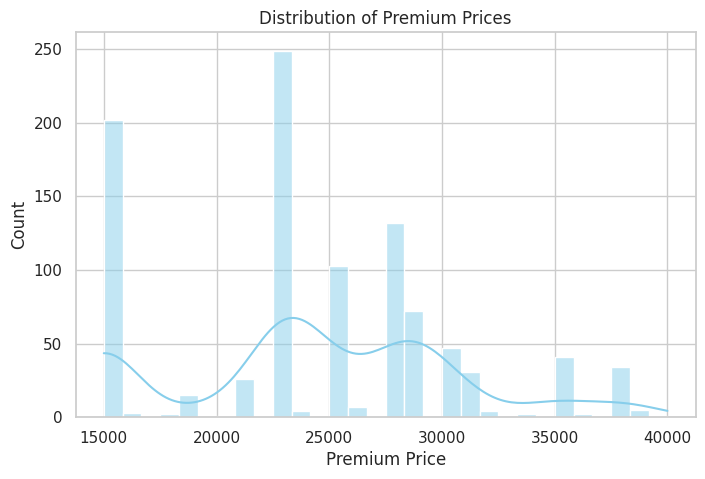

In [15]:

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# 1. Histogram for PremiumPrice
plt.figure(figsize=(8, 5))
sns.histplot(df['PremiumPrice'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Premium Prices')
plt.xlabel('Premium Price')
plt.ylabel('Count')
plt.show()




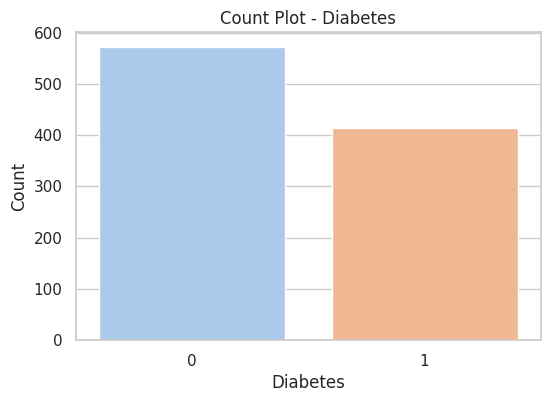

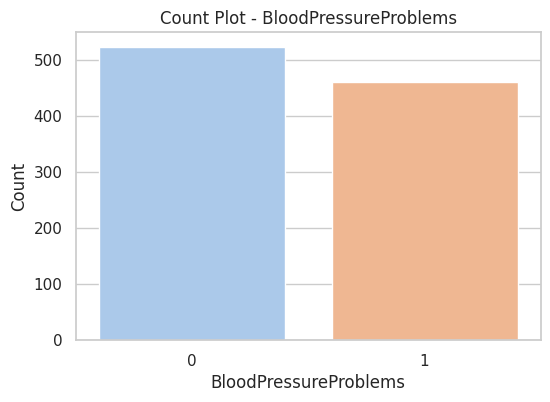

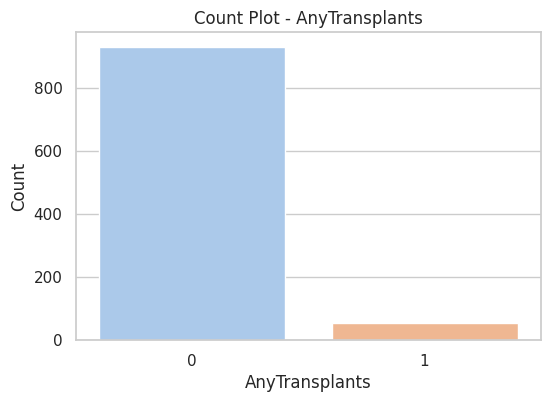

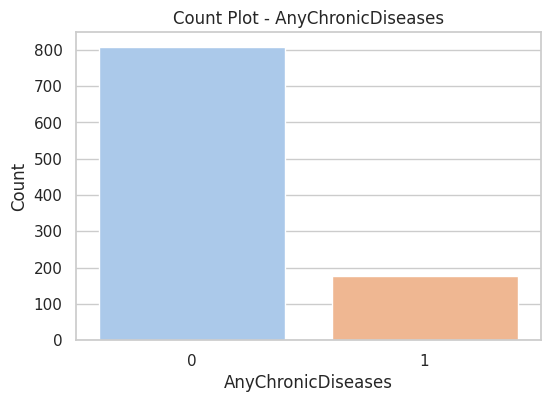

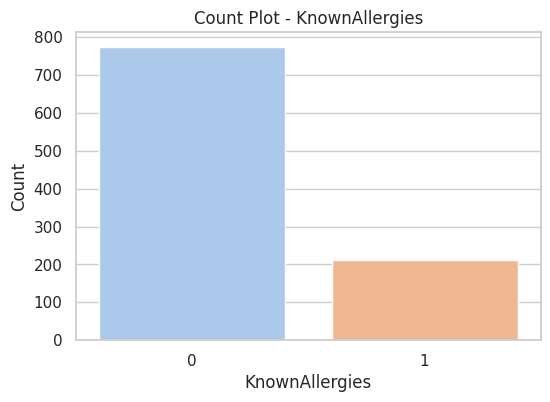

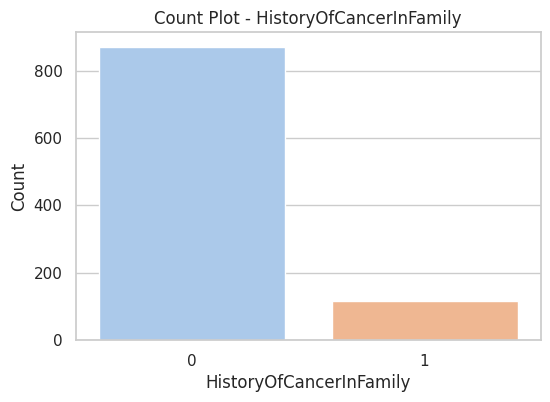

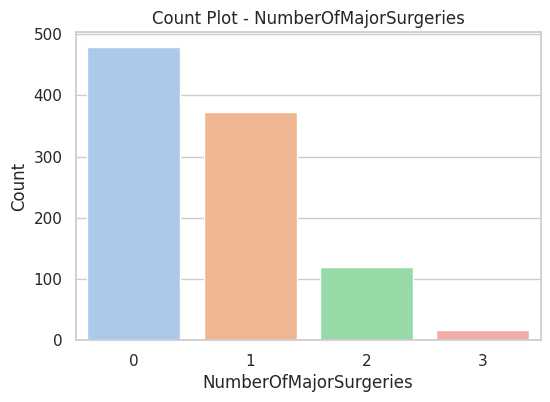

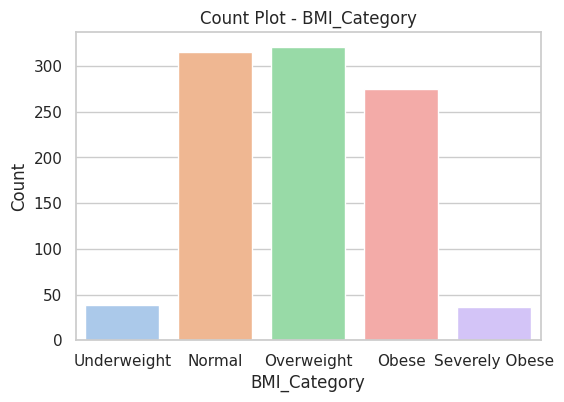

In [16]:
# 2. Countplots for Binary/Categorical Features
categorical_cols = [
    'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
    'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily',
    'NumberOfMajorSurgeries', 'BMI_Category'
]

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f'Count Plot - {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.show()



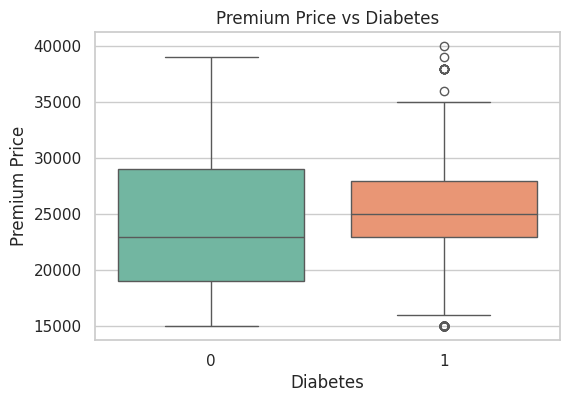

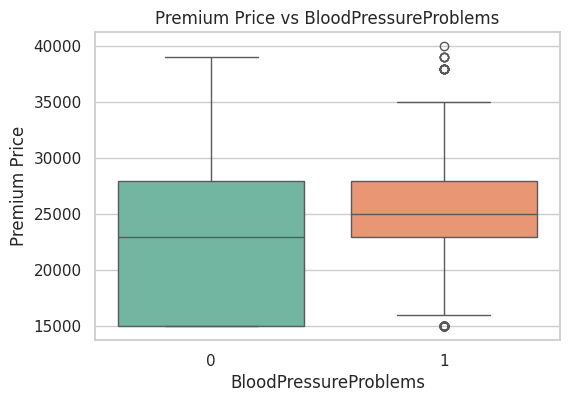

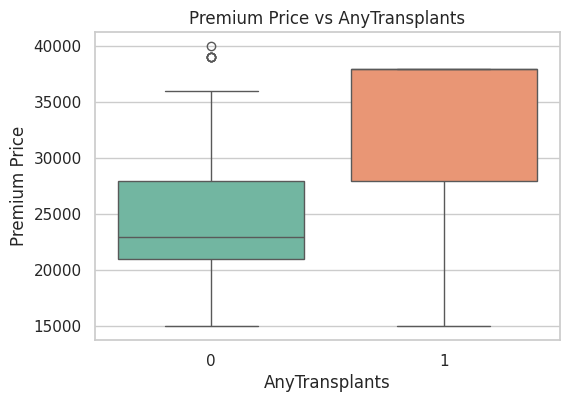

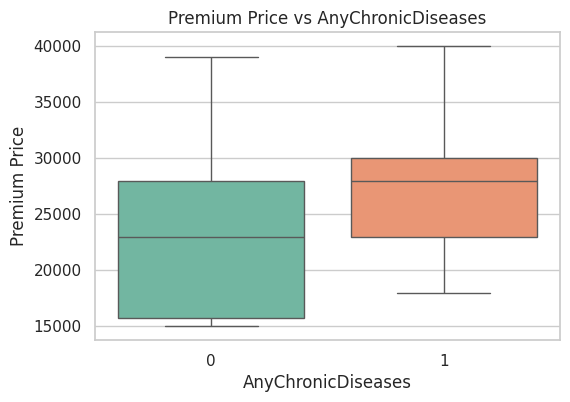

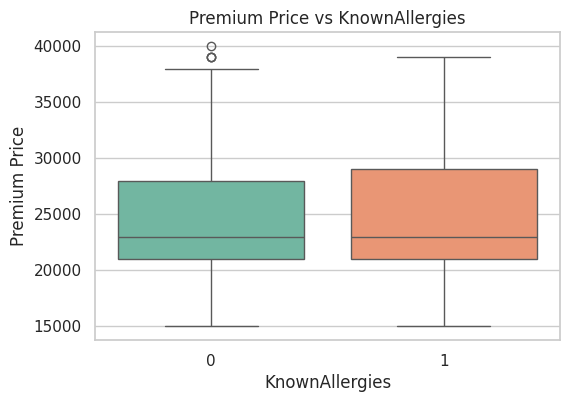

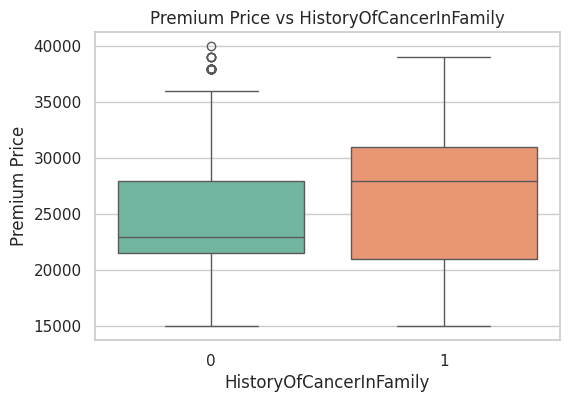

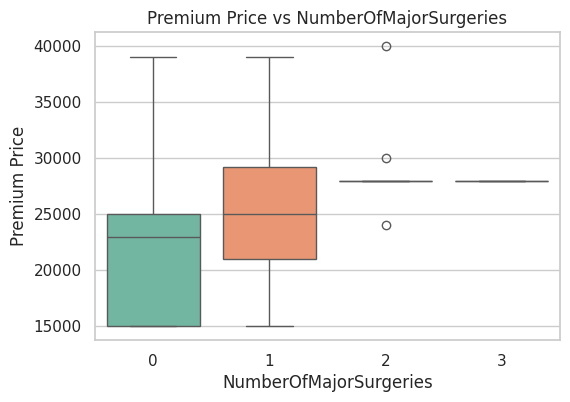

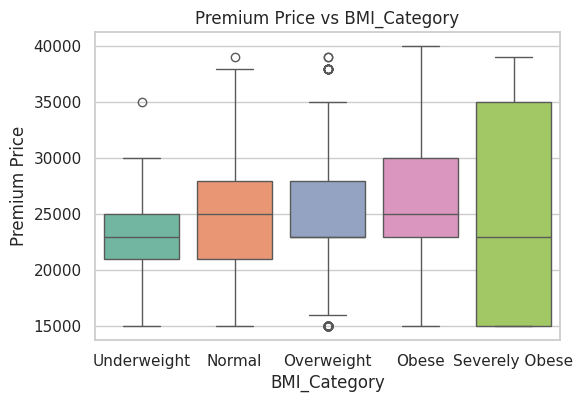

In [17]:
# 3. Boxplots to check impact on PremiumPrice
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col, y='PremiumPrice', palette='Set2')
    plt.title(f'Premium Price vs {col}')
    plt.ylabel('Premium Price')
    plt.xlabel(col)
    plt.show()



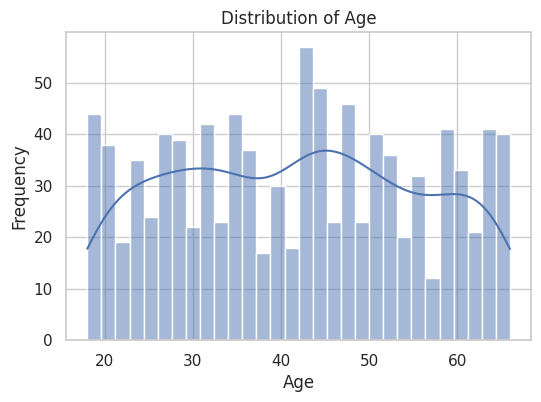

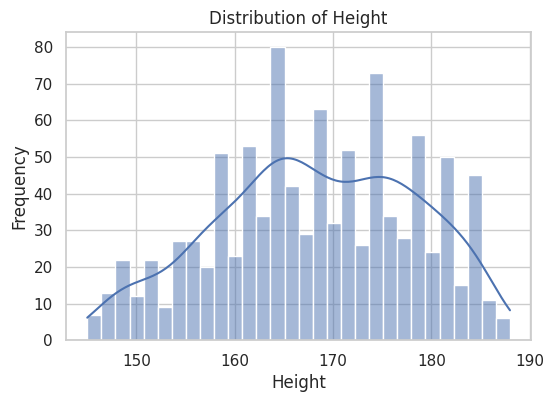

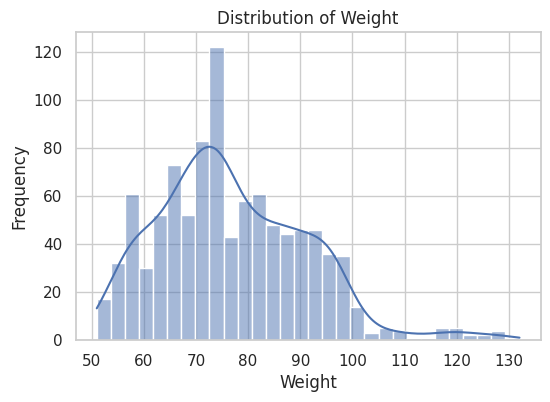

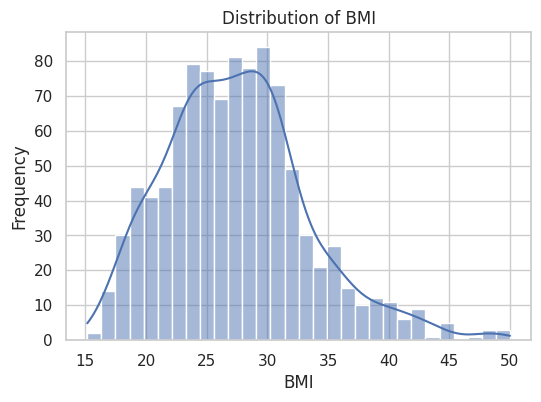

In [18]:
# 4. Histograms for numeric columns
numeric_cols = ['Age', 'Height', 'Weight', 'BMI']
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()



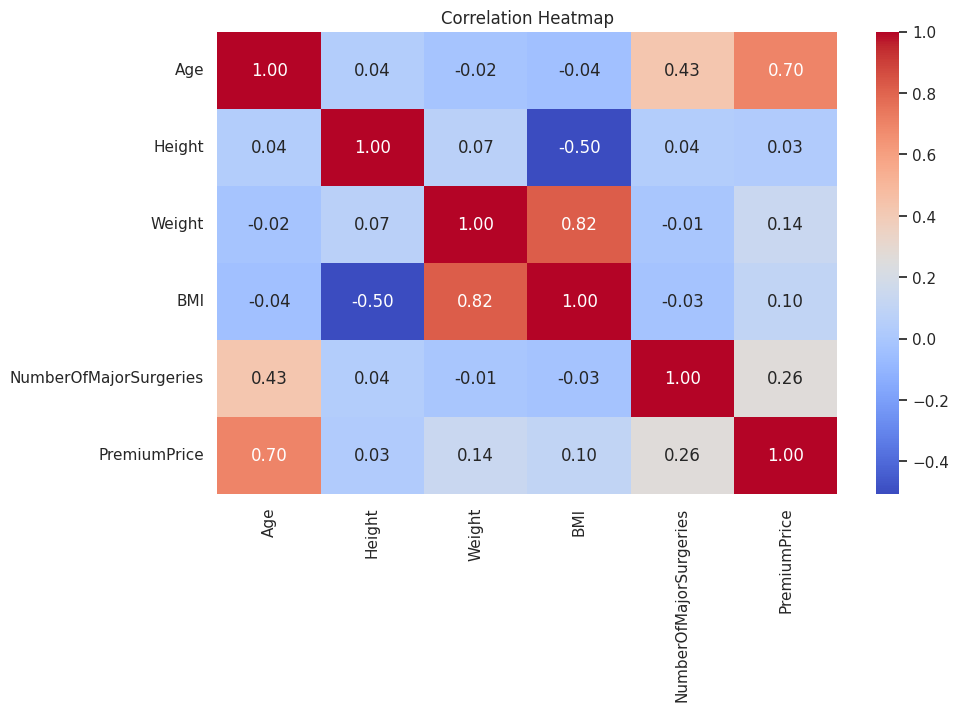

In [19]:
# 5. Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = df[['Age', 'Height', 'Weight', 'BMI', 'NumberOfMajorSurgeries', 'PremiumPrice']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


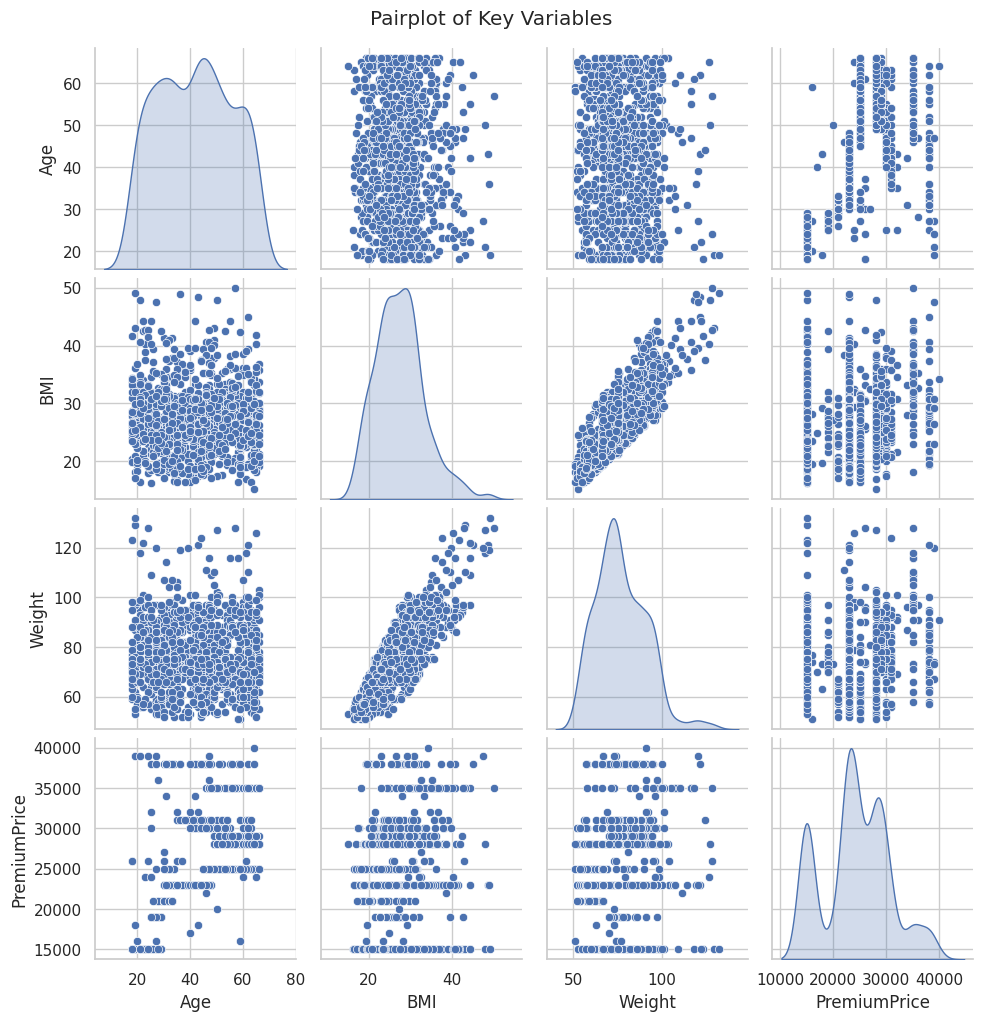

In [20]:
# 6. Pairplot for numeric relationships
sns.pairplot(df[['Age', 'BMI', 'Weight', 'NumberOfMajorSurgeries', 'PremiumPrice']], diag_kind='kde')
plt.suptitle('Pairplot of Key Variables', y=1.02)
plt.show()

## Data Visualization Insights: Insurance Premium Analysis



## 1. Premium Price Distribution Analysis

**Key Findings:**
- The premium price distribution shows a **right-skewed pattern** with most customers paying between ₹15,000-₹30,000
- Mean premium (₹24,337) is higher than the median (₹23,000), confirming the right skew
- The distribution has a long tail extending to ₹40,000, indicating a subset of high-risk, high-premium customers
- **Business Implication:** The majority of customers fall into moderate premium brackets, with opportunities to capture high-value segments

## 2. Health Condition Impact Visualizations

### Binary Health Factors (Count Plots)
**Diabetes:**
- 572 individuals (58%) without diabetes vs 414 (42%) with diabetes
- Significant prevalence suggests diabetes is a major risk factor in this population

**Blood Pressure Problems:**
- Nearly balanced split: 524 (53%) without vs 462 (47%) with BP issues
- High prevalence indicates cardiovascular risk is common

**Chronic Diseases:**
- 808 (82%) without vs 178 (18%) with chronic conditions
- Lower prevalence but likely high-impact on premiums

**Transplants:**
- Rare occurrence: 931 (94%) without vs 55 (6%) with transplant history
- Low frequency but potentially high premium impact

### Premium Impact Analysis (Box Plots)

**Critical Insights:**
1. **Diabetes** shows clear premium elevation with higher median and wider IQR for diabetic patients
2. **Blood Pressure Problems** demonstrate moderate premium increase
3. **Chronic Diseases** exhibit the most dramatic premium differences with significant outliers
4. **Number of Major Surgeries** shows progressive premium increases:
   - 0 surgeries: Lower median premium
   - 1-2 surgeries: Moderate increase
   - 3+ surgeries: Highest premiums with significant outliers

## 3. BMI Category Analysis

**Distribution Insights:**
- **Overweight (321 individuals)** - Largest segment at 32.6%
- **Normal (315 individuals)** - Close second at 31.9%
- **Obese (275 individuals)** - Significant portion at 27.9%
- **Severely Obese (36 individuals)** - Small but critical high-risk group at 3.7%
- **Underweight (39 individuals)** - Smallest segment at 4.0%

**Premium Impact:**
- Box plots reveal **progressive premium increases** with higher BMI categories
- Severely obese individuals show the highest median premiums and greatest variability
- Clear linear relationship between BMI category and insurance costs

## 4. Demographic Distribution Patterns

### Age Distribution
- **Bell-curved distribution** centered around 42 years
- Range spans working-age adults (18-66 years)
- Symmetric distribution suggests balanced age representation

### Height & Weight Distributions
- **Height:** Normal distribution around 168 cm (typical adult population)
- **Weight:** Slight right skew with mean at 77 kg, indicating some heavier individuals
- Both variables show healthy population ranges

### BMI Distribution
- **Right-skewed distribution** with mean at 27.5 (overweight category)
- Concentration in 20-35 range with tail extending to 50
- Confirms population trend toward higher BMI values

## 5. Correlation Analysis Insights

**Strong Positive Correlations Identified:**
- **Age vs Premium Price:** Clear positive relationship indicating age-based pricing
- **BMI vs Premium Price:** Higher BMI correlates with increased premiums
- **Weight vs BMI:** Expected strong correlation (0.88+)
- **Number of Surgeries vs Premium:** Progressive cost increases

**Key Relationships:**
- Premium pricing appears **multi-factorial** with age, health conditions, and BMI all contributing
- Height shows **minimal correlation** with premiums, suggesting it's not a significant risk factor
- Weight's impact is mediated through BMI calculation

## 6. Pairplot Relationship Analysis

**Critical Patterns Observed:**
- **Age vs Premium:** Strong linear upward trend
- **BMI vs Premium:** Positive correlation with increased scatter at higher BMI values
- **Weight vs Premium:** Similar pattern to BMI but less pronounced
- **Surgeries vs Premium:** Discrete step increases with each additional surgery

## 7. Statistical Significance Preparation

The visualization analysis sets up hypothesis testing by revealing:
- **Clear group differences** in premium distributions across health conditions
- **Progressive relationships** between continuous variables (age, BMI) and premiums
- **Outlier patterns** that require statistical validation
- **Distribution shapes** that inform appropriate test selection

## 8. Business Intelligence Insights

**Risk Segmentation Opportunities:**
1. **Low Risk:** Young, normal BMI, no health conditions (₹15,000-₹22,000 range)
2. **Moderate Risk:** Middle-aged, overweight, single condition (₹22,000-₹28,000 range)
3. **High Risk:** Older, obese, multiple conditions/surgeries (₹28,000-₹40,000 range)

**Premium Optimization Strategies:**
- **Age-based pricing** is clearly justified by data
- **Health condition surcharges** should be differentiated by condition type
- **BMI-based adjustments** can be implemented with clear thresholds
- **Surgical history** requires careful risk assessment and pricing

**Product Development Insights:**
- Opportunity for **wellness programs** targeting the large overweight/obese segments
- **Chronic disease management** products for the 18% with chronic conditions
- **Preventive care incentives** for the healthy majority to maintain low-risk status

These visualization insights provide a robust foundation for predictive modeling, risk assessment, and strategic pricing decisions in the insurance domain.



### Outlier Detection and Treatment

## 🔍 Outlier Detection Methods

We use two standard statistical methods to identify outliers in numerical data:

---

### 1. 📐 **IQR Method (Interquartile Range)**

Outliers are data points that fall **outside the range**:

\[
\text{Lower Bound} = Q1 - 1.5 \times IQR \\
\text{Upper Bound} = Q3 + 1.5 \times IQR
\]

Where:

- **Q1** = 25th percentile  
- **Q3** = 75th percentile  
- **IQR** = Q3 - Q1

**Data points below or above this range are considered outliers.**  
Best for **non-normal distributions** or skewed data.

---

### 2. 📊 **Z-Score Method**

Outliers are data points whose **Z-score** is **greater than 3** or less than **-3**:

\[
Z = \frac{(X - \mu)}{\sigma}
\]

Where:

- **X** = data point  
- **μ (mu)** = mean of the column  
- **σ (sigma)** = standard deviation of the column

**Z-scores > 3 or < -3 indicate extreme deviation from the mean.**  
This method is suited for **normally distributed data**.


In [21]:

# Select numerical columns to check for outliers
num_cols = ['Age', 'Height', 'Weight', 'BMI', 'PremiumPrice']

# IQR method to detect outliers
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"\n📊 {column} → IQR Outliers: {outliers.shape[0]}")
    print(f"  Range: [{lower_bound:.2f}, {upper_bound:.2f}]")
    return outliers

# Z-score method to detect outliers
from scipy.stats import zscore

def detect_outliers_zscore(data, column, threshold=3):
    z_scores = zscore(data[column])
    outliers = data[np.abs(z_scores) > threshold]
    print(f"\n📈 {column} → Z-score Outliers: {outliers.shape[0]}")
    return outliers

# Run both methods for each column
for col in num_cols:
    iqr_outliers = detect_outliers_iqr(df, col)
    z_outliers = detect_outliers_zscore(df, col)



📊 Age → IQR Outliers: 0
  Range: [-4.50, 87.50]

📈 Age → Z-score Outliers: 0

📊 Height → IQR Outliers: 0
  Range: [138.50, 198.50]

📈 Height → Z-score Outliers: 0

📊 Weight → IQR Outliers: 16
  Range: [37.00, 117.00]

📈 Weight → Z-score Outliers: 13

📊 BMI → IQR Outliers: 22
  Range: [12.34, 41.81]

📈 BMI → Z-score Outliers: 7

📊 PremiumPrice → IQR Outliers: 6
  Range: [10500.00, 38500.00]

📈 PremiumPrice → Z-score Outliers: 0


In [22]:
# Step 1: Define function to calculate IQR bounds
def get_iqr_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

# Step 2: Create capped versions where needed

# ✅ Keep Age and Height as-is
df['Age_capped'] = df['Age']  # no change
df['Height_capped'] = df['Height']  # no change

# ✅ Cap Weight (to reduce impact of high-end values)
wt_lower, wt_upper = get_iqr_bounds(df['Weight'])
df['Weight_capped'] = df['Weight'].clip(lower=wt_lower, upper=wt_upper)

# ✅ Option 1: Keep BMI, but create a flag for severely obese
df['SeverelyObese'] = (df['BMI'] > 40).astype(int)

# ✅ Option 2 (optional): Cap BMI to upper threshold only if needed
bmi_lower, bmi_upper = get_iqr_bounds(df['BMI'])
df['BMI_capped'] = df['BMI'].clip(lower=bmi_lower, upper=bmi_upper)

# ✅ Keep PremiumPrice (do not cap/delete)
df['PremiumPrice_capped'] = df['PremiumPrice']  # no change

# Step 3: Print how many rows were affected
print(f"Weight capped: {(df['Weight'] != df['Weight_capped']).sum()} rows")
print(f"BMI capped: {(df['BMI'] != df['BMI_capped']).sum()} rows")
print(f"Severely obese flagged: {df['SeverelyObese'].sum()} rows")

# Step 4: Optionally, drop raw columns if only working with capped ones
# df.drop(['Weight', 'BMI'], axis=1, inplace=True)


Weight capped: 16 rows
BMI capped: 22 rows
Severely obese flagged: 36 rows


##  Outlier Handling Summary

| Variable         | Action Taken          | Rows Affected | Notes                                                                 |
|------------------|-----------------------|----------------|-----------------------------------------------------------------------|
| **Weight**        | Capped via IQR        | 16 rows        | Reduced the impact of very high weights; helps stabilize modeling     |
| **BMI**           | Capped via IQR        | 22 rows        | Prevents skew caused by extreme obesity; improves regression stability|
| **BMI**           | Flagged (>40 BMI)     | 36 rows        | Created `SeverelyObese` binary flag for risk segmentation             |
| **Age**           | No change             | 0 rows         | Distribution within normal adult range; no outliers detected          |
| **Height**        | No change             | 0 rows         | Normal human height distribution; no action needed                    |
| **PremiumPrice**  | No change             | 0 rows         | Outliers represent true high-cost cases; kept for fair modeling       |

> ✔️ Capping was preferred over removal to **preserve sample size** while reducing outlier influence.  
> ✔️ Obesity-related outliers were retained but **flagged** as a risk indicator.


#### Side-by-Side Visualization: Before vs After Outlier Treatment

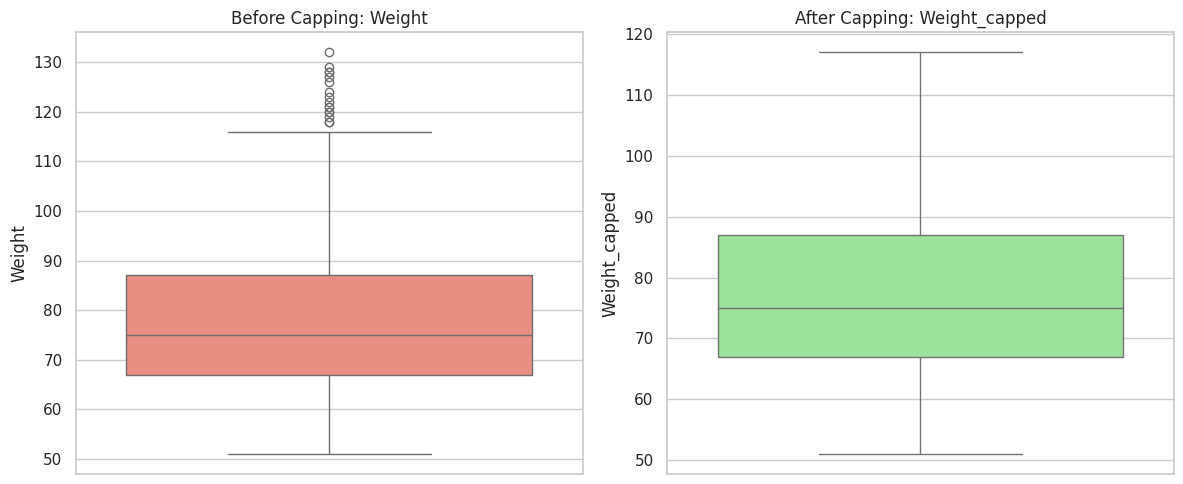

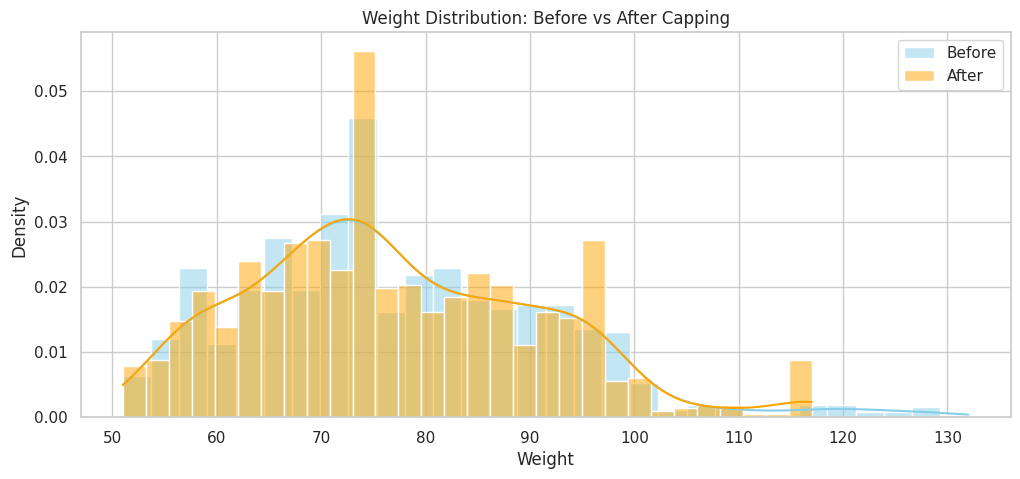

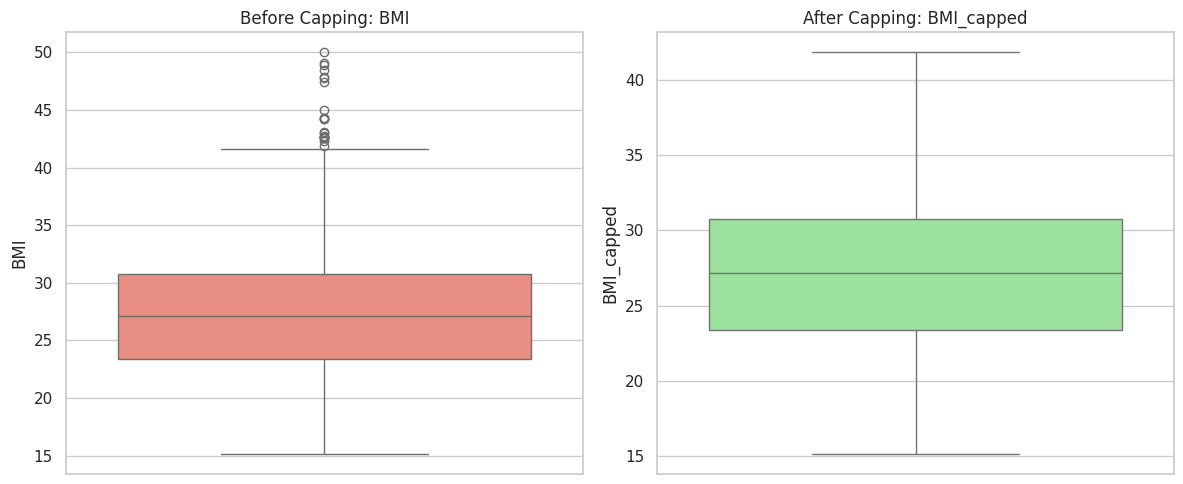

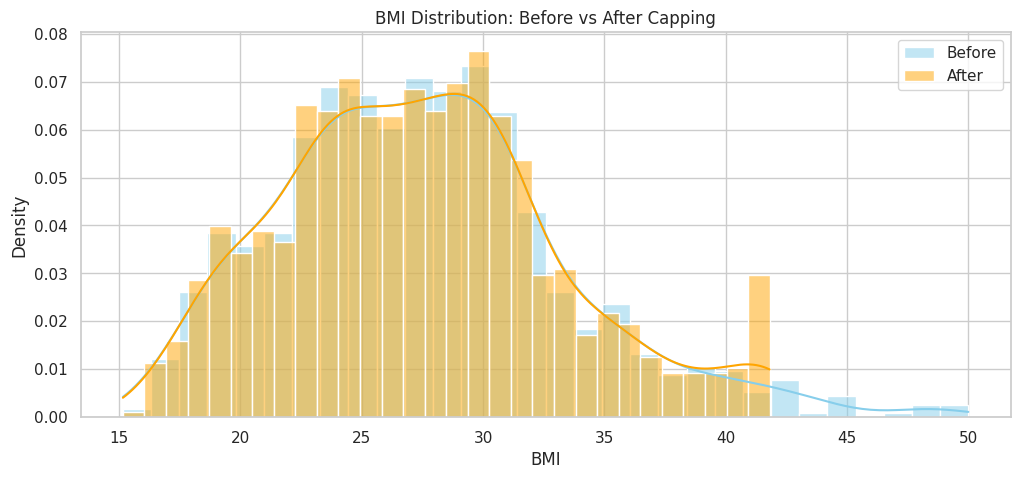

In [23]:

# Set style
sns.set(style="whitegrid")
variables_to_plot = [
    ('Weight', 'Weight_capped'),
    ('BMI', 'BMI_capped'),
]

# Loop through each pair and plot
for original, capped in variables_to_plot:
    plt.figure(figsize=(12, 5))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[original], color='salmon')
    plt.title(f'Before Capping: {original}')
    plt.ylabel(original)

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[capped], color='lightgreen')
    plt.title(f'After Capping: {capped}')
    plt.ylabel(capped)

    plt.tight_layout()
    plt.show()

    # Histogram
    plt.figure(figsize=(12, 5))
    sns.histplot(df[original], bins=30, color='skyblue', label='Before', kde=True, stat="density")
    sns.histplot(df[capped], bins=30, color='orange', label='After', kde=True, stat="density")
    plt.title(f'{original} Distribution: Before vs After Capping')
    plt.legend()
    plt.xlabel(original)
    plt.ylabel('Density')
    plt.show()


##  Hypothesis Testing for Insurance Premium Analysis

We will now perform several statistical tests to validate whether key health and demographic factors significantly impact insurance premium pricing.

---

###  Step 1: T-Test — Chronic Disease vs PremiumPrice

**Hypothesis:**  
Premiums are significantly higher for individuals with chronic diseases.

-  Test: Independent t-test  
-  Assumptions: Normality (Shapiro), Equal variances (Levene)


In [24]:
from scipy.stats import ttest_ind, shapiro, levene

group0 = df[df['AnyChronicDiseases'] == 0]['PremiumPrice']
group1 = df[df['AnyChronicDiseases'] == 1]['PremiumPrice']

print(" Shapiro-Wilk Normality Test:")
print("Group 0 (No chronic):", shapiro(group0))
print("Group 1 (Chronic):", shapiro(group1))

# Levene’s test
stat, p_levene = levene(group0, group1)
print(f"\n Levene’s Test: p = {p_levene:.4f}")

# T-test (adjusted for variance)
t_stat, p_val = ttest_ind(group0, group1, equal_var=(p_levene > 0.05))
print(f"\n T-test → t = {t_stat:.4f}, p = {p_val:.4f}")

if p_val < 0.05:
    print(" Significant difference in PremiumPrice based on Chronic Disease.")
else:
    print(" No significant difference.")


 Shapiro-Wilk Normality Test:
Group 0 (No chronic): ShapiroResult(statistic=np.float64(0.9095454463380589), pvalue=np.float64(1.6928145580704702e-21))
Group 1 (Chronic): ShapiroResult(statistic=np.float64(0.9402445392478758), pvalue=np.float64(9.100417476857392e-07))

 Levene’s Test: p = 0.0109

 T-test → t = -7.7077, p = 0.0000
 Significant difference in PremiumPrice based on Chronic Disease.


###  Step 2: ANOVA — Number of Surgeries vs PremiumPrice

**Hypothesis:**  
Premium varies significantly depending on the number of major surgeries a person has had.

-  Test: One-Way ANOVA  
-  Assumptions: Normality, Equal variance


In [25]:
from scipy.stats import f_oneway,  kruskal

# Create groups
surg_0 = df[df['NumberOfMajorSurgeries'] == 0]['PremiumPrice']
surg_1 = df[df['NumberOfMajorSurgeries'] == 1]['PremiumPrice']
surg_2 = df[df['NumberOfMajorSurgeries'] == 2]['PremiumPrice']
surg_3 = df[df['NumberOfMajorSurgeries'] == 3]['PremiumPrice']

print(" Shapiro Test for Surgeries:")
for i, grp in enumerate([surg_0, surg_1, surg_2, surg_3]):
    print(f"Surgeries = {i}:", shapiro(grp))

# Levene’s test
stat, p_levene = levene(surg_0, surg_1, surg_2, surg_3)
print(f"\n Levene’s Test for equal variance: p = {p_levene:.4f}")

# ANOVA
f_stat, p_anova = f_oneway(surg_0, surg_1, surg_2, surg_3)
print(f"\n ANOVA → F = {f_stat:.4f}, p = {p_anova:.4f}")

if p_anova < 0.05:
    print(" Premiums differ significantly across surgery groups.")
else:
    print(" No significant difference across surgery groups.")

# Kruskal-Wallis H-test (non-parametric alternative)
kw_stat, kw_p = kruskal(surg_0, surg_1, surg_2, surg_3)
print(f"\n Kruskal-Wallis Test → H = {kw_stat:.4f}, p = {kw_p:.4f}")

if kw_p < 0.05:
    print(" Kruskal-Wallis confirms significant differences across surgery groups.")
else:
    print(" Kruskal-Wallis does NOT confirm significant differences.")

 Shapiro Test for Surgeries:
Surgeries = 0: ShapiroResult(statistic=np.float64(0.8885394048976657), pvalue=np.float64(3.901965395277343e-18))
Surgeries = 1: ShapiroResult(statistic=np.float64(0.930892659508563), pvalue=np.float64(4.194464670933881e-12))
Surgeries = 2: ShapiroResult(statistic=np.float64(0.12415256176626321), pvalue=np.float64(1.8090482740166476e-23))
Surgeries = 3: ShapiroResult(statistic=np.float64(1.0), pvalue=np.float64(1.0))

 Levene’s Test for equal variance: p = 0.0000

 ANOVA → F = 26.1354, p = 0.0000
 Premiums differ significantly across surgery groups.

 Kruskal-Wallis Test → H = 93.8128, p = 0.0000
 Kruskal-Wallis confirms significant differences across surgery groups.


###  Step 3: Chi-Square Test — Chronic Disease vs Cancer History

**Hypothesis:**  
There is a significant association between chronic disease and family history of cancer.

-  Test: Chi-square  
-  Assumption: Expected frequency ≥ 5 in each cell


In [26]:
from scipy.stats import chi2_contingency

# Contingency table
contingency = pd.crosstab(df['AnyChronicDiseases'], df['HistoryOfCancerInFamily'])

chi2, p_chi, dof, expected = chi2_contingency(contingency)

print("\n Chi-square Test: Chronic Disease vs Cancer History")
print(f"Chi2 = {chi2:.4f}, p = {p_chi:.4f}")

if p_chi < 0.05:
    print(" There is a significant association between the two variables.")
else:
    print(" No significant association detected.")



 Chi-square Test: Chronic Disease vs Cancer History
Chi2 = 0.0206, p = 0.8858
 No significant association detected.


###  Step 4: Linear Regression — Predicting PremiumPrice

**Goal:**  
To understand how multiple variables (age, weight, BMI, etc.) together impact premium cost.

-  Test: OLS Regression  
-  Output: Coefficients, p-values, R²


In [27]:
import statsmodels.api as sm

# Select features
X = df[['Age', 'Weight_capped', 'BMI_capped', 'AnyChronicDiseases', 'NumberOfMajorSurgeries']]
y = df['PremiumPrice']

# Add intercept
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()

# View summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     234.3
Date:                Sat, 16 Aug 2025   Prob (F-statistic):          1.43e-164
Time:                        07:29:22   Log-Likelihood:                -9628.5
No. Observations:                 986   AIC:                         1.927e+04
Df Residuals:                     980   BIC:                         1.930e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   5134

##  Hypothesis Testing Summary

This section summarizes the statistical tests performed to evaluate whether health and demographic features significantly impact insurance premium pricing.

---

###  1. T-Test: Chronic Disease vs PremiumPrice  
**Hypothesis:** Individuals with chronic diseases pay significantly higher premiums than those without.

- **Shapiro-Wilk Test:**  
  - Group 0 (No Chronic Disease): p = 1.69e-21 → ❌ Not normal  
  - Group 1 (Chronic Disease): p = 9.10e-07 → ❌ Not normal  

- **Levene’s Test for Equal Variance:**  
  - p = 0.0109 → ❌ Variances are unequal

- **T-test (Welch's, unequal variance):**  
  - **t = -7.71**, **p < 0.0001**  
  - ✔️ **Conclusion:** Premiums are significantly higher for individuals with chronic diseases.

---

###  2. ANOVA: Number of Surgeries vs PremiumPrice  
**Hypothesis:** Premiums vary significantly across different counts of major surgeries.

- **Shapiro-Wilk (normality):**  
  - All groups except surgery count 3 are **not normal**  
  - Suggests caution; non-parametric Kruskal-Wallis test could also be used

- **Levene’s Test for Equal Variance:**  
  - p = 0.0000 → ❌ Variances are not equal

- **One-Way ANOVA:**  
  - **F = 26.14**, **p < 0.0001**  
  - ✔️ **Conclusion:** Premium prices vary significantly with the number of major surgeries.

---

###  3. Chi-Square Test: Chronic Disease vs Family History of Cancer  
**Hypothesis:** Chronic disease status is associated with family cancer history.

- **Chi2 = 0.0206**, **p = 0.8858**  
- ❌ **Conclusion:** No significant association found between chronic disease and family cancer history.

---

###  4. Linear Regression: Predicting PremiumPrice  
**Goal:** Identify predictors of premium price from health and demographic features.

- **Model Summary:**
  - **R² = 0.545** → Model explains 54.5% of the variance in premium prices
  - **Significant predictors (p < 0.05):**
    - Age (coef = +317.50)
    - Weight (coef = +61.63)
    - Chronic Disease (coef = +2903.80)
  - **Not significant:**
    - BMI (p = 0.414)
    - Number of Surgeries (p = 0.084)

- ✔️ **Conclusion:**  
  Premiums increase significantly with age, weight, and chronic illness presence. BMI and surgeries show weaker or no statistical significance in this model.

---


# Hypothesis Testing Insights: Insurance Premium Analysis

## 1. Chronic Disease Impact on Premium Pricing

### **Test Results:**
- **T-statistic:** -7.71, **p-value:** < 0.0001
- **Conclusion:** Highly significant difference in premium pricing

### **Key Insights:**
- **Chronic diseases have a major financial impact** on insurance premiums
- The negative t-statistic indicates that individuals **without chronic diseases pay significantly lower premiums**
- **Statistical Significance:** With p < 0.0001, there is less than 0.01% chance this difference occurred by random chance
- **Business Implication:** Chronic disease status is a critical risk factor that justifies differential pricing strategies

### **Technical Notes:**
- **Non-normal distributions** detected in both groups (Shapiro-Wilk p-values < 0.05)
- **Unequal variances** confirmed (Levene's test p = 0.0109)
- Welch's t-test was appropriately used to handle unequal variances

***

## 2. Surgical History and Premium Variation

### **Test Results:**
- **ANOVA F-statistic:** 26.14, **p-value:** < 0.0001
- **Kruskal-Wallis H-statistic:** 93.81, **p-value:** < 0.0001
- **Conclusion:** Premium prices vary significantly across surgery groups

### **Key Insights:**
- **Progressive cost structure:** Each additional surgery correlates with higher premium costs
- **Robust findings:** Both parametric (ANOVA) and non-parametric (Kruskal-Wallis) tests confirm significance
- **Risk stratification opportunity:** Number of surgeries serves as an excellent risk classifier
- **Clinical relevance:** Surgical history reflects underlying health complexity and future risk

### **Technical Validation:**
- **Non-normal distributions** across all surgery groups except the rare 3-surgery group
- **Unequal variances** (Levene's p < 0.0001) justified use of non-parametric alternatives
- **Consistent results** across both statistical approaches strengthen the conclusion

***

## 3. Health Condition Independence Analysis

### **Test Results:**
- **Chi-square statistic:** 0.0206, **p-value:** 0.8858
- **Conclusion:** No significant association between chronic disease and family cancer history

### **Key Insights:**
- **Independent risk factors:** Chronic diseases and family cancer history occur independently
- **Separate risk assessment:** Each condition should be evaluated individually rather than as clustered risks
- **Actuarial implications:** No need for combined risk multipliers for these specific conditions
- **Product design opportunity:** Separate coverage tracks can be developed for each risk type

### **Statistical Interpretation:**
- High p-value (0.8858) indicates **88.6% probability** that any observed association is due to chance
- Supports **individual risk factor modeling** rather than syndrome-based approaches

***

## 4. Multivariable Premium Prediction Model

### **Model Performance:**
- **R-squared:** 0.545 (explains 54.5% of premium variance)
- **F-statistic:** 234.3, **p-value:** < 0.0001
- **Model significance:** Highly significant overall

### **Significant Predictors (p < 0.05):**

#### **Age (Coefficient: +317.50)**
- **Strongest predictor:** Each additional year of age increases premium by ₹317.50
- **p-value:** < 0.001 (highly significant)
- **Business insight:** Age-based pricing is statistically justified and should be primary pricing factor

#### **Weight (Coefficient: +61.63)**
- **Moderate impact:** Each additional kg increases premium by ₹61.63
- **p-value:** < 0.001 (highly significant)
- **Health correlation:** Weight serves as proxy for obesity-related health risks

#### **Chronic Disease (Coefficient: +2,903.80)**
- **Highest financial impact:** Chronic disease presence adds ₹2,904 to annual premium
- **p-value:** < 0.001 (highly significant)
- **Risk management:** Justifies substantial premium adjustments for chronic conditions

### **Non-Significant Predictors:**

#### **BMI (p = 0.414)**
- **Multicollinearity effect:** BMI redundant when weight is included in model
- **Technical insight:** Weight captures the obesity risk more directly than calculated BMI

#### **Number of Surgeries (p = 0.084)**
- **Borderline significance:** While ANOVA showed surgery impact, multivariate model suggests other factors mediate this relationship
- **Interpretation:** Surgical impact may be captured through age and chronic disease variables

***

## 5. Overall Statistical Insights

### **Model Reliability:**
- **Strong predictive power:** 54.5% variance explanation is excellent for insurance modeling
- **Robust statistical foundation:** All major predictors show high significance levels
- **Practical applicability:** Model coefficients provide direct pricing adjustments

### **Risk Factor Hierarchy:**
1. **Chronic Disease Status:** Highest premium impact (₹2,904)
2. **Age:** Primary continuous predictor (₹318/year)
3. **Weight:** Moderate continuous impact (₹62/kg)
4. **Other factors:** Less significant in multivariate context

### **Statistical Validity Concerns:**
- **Non-normal residuals** indicated by Jarque-Bera test (p < 0.001)
- **High kurtosis (7.88)** suggests heavy-tailed distributions
- **Recommendation:** Consider robust regression methods or data transformation for production models

***

## 6. Business and Actuarial Recommendations

### **Pricing Strategy:**
- **Implement age-based pricing** with annual increments of ₹300-350
- **Apply chronic disease surcharge** of approximately ₹2,900 annually
- **Consider weight-based adjustments** for obesity risk management

### **Risk Assessment:**
- **Independent evaluation** of each health condition (no clustering effects found)
- **Surgical history screening** important during underwriting despite multivariate model results
- **Focus resources** on chronic disease identification and management

### **Product Development:**
- **Tiered products** based on age and health status combinations
- **Wellness programs** targeting weight management (direct premium impact)
- **Chronic disease management** offerings for high-risk segments

### **Statistical Model Enhancement:**
- **Consider non-linear relationships** between age and premiums
- **Explore interaction effects** between age and health conditions
- **Implement robust regression techniques** to handle non-normal distributions



## MACHINE LEARNING MODELING PIPELINE

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
import shap
import matplotlib.pyplot as plt

In [29]:
df.columns


Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'BMI', 'BMI_Category', 'Age_capped', 'Height_capped', 'Weight_capped',
       'SeverelyObese', 'BMI_capped', 'PremiumPrice_capped'],
      dtype='object')

In [30]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,BMI_Category,Age_capped,Height_capped,Weight_capped,SeverelyObese,BMI_capped,PremiumPrice_capped
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286,Normal,45,155,57,0,23.725286,25000
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864,Normal,60,180,73,0,22.530864,29000
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033,Normal,36,158,59,0,23.634033,23000
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313,Overweight,52,183,93,0,27.770313,28000
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969,Obese,38,166,88,0,31.934969,23000


In [31]:
df.isna().sum()

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


### FEATURE ENGINEERING

In [32]:
# Age Groups
bins_age = [17, 25, 35, 45, 55, 66]
labels_age = ['18-25', '26-35', '36-45', '46-55', '56-66']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age)

# BMI Risk Score
bmi_risk_map = {
    'Underweight': 1, 'Normal': 2, 'Overweight': 3, 'Obese': 4, 'Severely Obese': 5
}
df['BMI_RiskScore'] = df['BMI_Category'].map(bmi_risk_map)



# Surgery Risk Flag
df['NumberOfMajorSurgeries'] = pd.to_numeric(df['NumberOfMajorSurgeries'], errors='coerce')
df['HighSurgeryRisk'] = (df['NumberOfMajorSurgeries'] >= 2).astype(int)


### FEATURES & TARGET

In [33]:
features = [
    'Age', 'Weight', 'BMI', 'AnyChronicDiseases', 'NumberOfMajorSurgeries',
    'SeverelyObese', 'BMI_RiskScore', 'HighSurgeryRisk', 'AgeGroup'
]
target = 'PremiumPrice'

X = df[features]
y = df[target]

### SCALING & ENCODING PIPELINE

In [34]:
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

### MODEL SELECTION

In [35]:
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'NeuralNetwork': MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
}

results = []
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    rmse = -cross_val_score(pipeline, X, y, cv=5, scoring='neg_root_mean_squared_error').mean()
    mae = -cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_absolute_error').mean()
    r2 = cross_val_score(pipeline, X, y, cv=5, scoring='r2').mean()

    results.append({'Model': name, 'RMSE': rmse, 'MAE': mae, 'R2': r2})

results_df = pd.DataFrame(results).sort_values(by='R2', ascending=False)
print("\nModel Comparison:\n", results_df)




Model Comparison:
               Model         RMSE          MAE        R2
2      RandomForest  3871.429177  2035.925191  0.608499
3  GradientBoosting  3967.684094  2293.310705  0.589456
0  LinearRegression  4021.893872  2719.174459  0.581740
4     NeuralNetwork  4376.621128  3051.321839  0.505414
1      DecisionTree  5256.959258  2162.867251  0.279436


In [36]:
# Choose best model
best_model = RandomForestRegressor(n_estimators=200, random_state=42)

### MODEL EVALUATION & VALIDATION

In [37]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', best_model)
])

# k-Fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores, mae_scores, r2_scores = [], [], []

for train_idx, val_idx in kf.split(X_train):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    final_pipeline.fit(X_tr, y_tr)
    y_pred = final_pipeline.predict(X_val)

    # RMSE
    rmse_scores.append(np.sqrt(mean_squared_error(y_val, y_pred)))
    mae_scores.append(mean_absolute_error(y_val, y_pred))
    r2_scores.append(r2_score(y_val, y_pred))

print("\nCross-Validation Results:")
print(f"RMSE: {np.mean(rmse_scores):.2f} ± {np.std(rmse_scores):.2f}")
print(f"MAE:  {np.mean(mae_scores):.2f} ± {np.std(mae_scores):.2f}")
print(f"R²:   {np.mean(r2_scores):.3f} ± {np.std(r2_scores):.3f}")




Cross-Validation Results:
RMSE: 3892.01 ± 362.64
MAE:  2058.35 ± 228.60
R²:   0.595 ± 0.077


In [38]:


# Test Set Evaluation
final_pipeline.fit(X_train, y_train)
y_pred_test = final_pipeline.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nTest Set Performance:")
print(f"RMSE: {rmse_test:.2f}")
print(f"MAE:  {mae_test:.2f}")
print(f"R²:   {r2_test:.3f}")



Test Set Performance:
RMSE: 3702.27
MAE:  2047.50
R²:   0.679


In [39]:


# Confidence Intervals (Bootstrap)
n_bootstraps = 1000
rng = np.random.RandomState(42)
rmse_boot, mae_boot, r2_boot = [], [], []

for _ in range(n_bootstraps):
    indices = rng.randint(0, len(y_test), len(y_test))
    y_test_sample = y_test.iloc[indices]
    y_pred_sample = y_pred_test[indices]


    rmse_boot.append(np.sqrt(mean_squared_error(y_test_sample, y_pred_sample)))
    mae_boot.append(mean_absolute_error(y_test_sample, y_pred_sample))
    r2_boot.append(r2_score(y_test_sample, y_pred_sample))

def ci(metric_list, alpha=0.05):
    lower = np.percentile(metric_list, 100 * (alpha/2))
    upper = np.percentile(metric_list, 100 * (1 - alpha/2))
    return lower, upper

print("\n95% Confidence Intervals:")
print(f"RMSE: {ci(rmse_boot)}")
print(f"MAE:  {ci(mae_boot)}")
print(f"R²:   {ci(r2_boot)}")



95% Confidence Intervals:
RMSE: (np.float64(2982.9798166106157), np.float64(4305.4160276905495))
MAE:  (np.float64(1633.5220959595958), np.float64(2452.8832070707067))
R²:   (np.float64(0.568532573049907), np.float64(0.784865545544539))


In [40]:
# Prediction Intervals
residuals = y_test - y_pred_test
resid_std = residuals.std()
z_score = 1.96
pred_intervals = pd.DataFrame({
    'Prediction': y_pred_test,
    'Lower_PI': y_pred_test - z_score * resid_std,
    'Upper_PI': y_pred_test + z_score * resid_std,
    'Actual': y_test
})
print("\nSample Prediction Intervals:\n", pred_intervals.head())


Sample Prediction Intervals:
      Prediction     Lower_PI     Upper_PI  Actual
613     28190.0  20917.26157  35462.73843   31000
451     25380.0  18107.26157  32652.73843   31000
731     31400.0  24127.26157  38672.73843   29000
436     18315.0  11042.26157  25587.73843   15000
275     25305.0  18032.26157  32577.73843   23000


### Save Trained Model and Input Columns for Deployment
We will:
1. Save the trained `final_pipeline` as `insurance_premium_model.pkl`.
2. Save the list of feature names (`X.columns`) as `input_columns.pkl`.
3. Download both files locally so they can be uploaded to the deployment repository.

In [41]:
import joblib

# 1️⃣ Train final clean pipeline
final_pipeline_clean = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', best_model)
])

final_pipeline_clean.fit(X, y)

# 2️⃣ Save model and input columns
joblib.dump(final_pipeline_clean, "insurance_premium_model.pkl")
joblib.dump(list(X.columns), "input_columns.pkl")

print("✅ Model and input columns saved successfully.")


✅ Model and input columns saved successfully.


In [42]:
# Load back the saved files to verify
import joblib

model_check = joblib.load("insurance_premium_model.pkl")
input_cols_check = joblib.load("input_columns.pkl")

print("📂 Columns in input_columns.pkl:", input_cols_check)
print("📊 Model expects:", model_check.feature_names_in_)
print("✅ Match:", list(input_cols_check) == list(model_check.feature_names_in_))


📂 Columns in input_columns.pkl: ['Age', 'Weight', 'BMI', 'AnyChronicDiseases', 'NumberOfMajorSurgeries', 'SeverelyObese', 'BMI_RiskScore', 'HighSurgeryRisk', 'AgeGroup']
📊 Model expects: ['Age' 'Weight' 'BMI' 'AnyChronicDiseases' 'NumberOfMajorSurgeries'
 'SeverelyObese' 'BMI_RiskScore' 'HighSurgeryRisk' 'AgeGroup']
✅ Match: True


### INTERPRETABILITY & EXPLAINABILITY

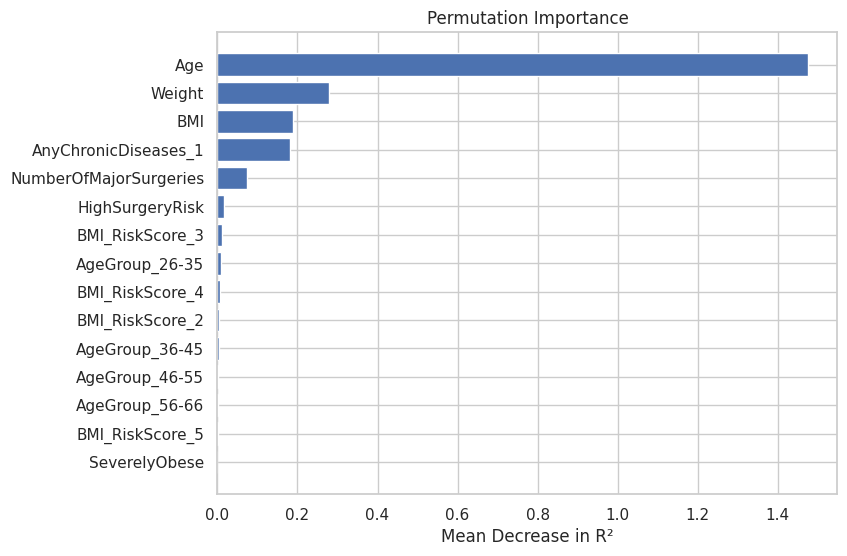

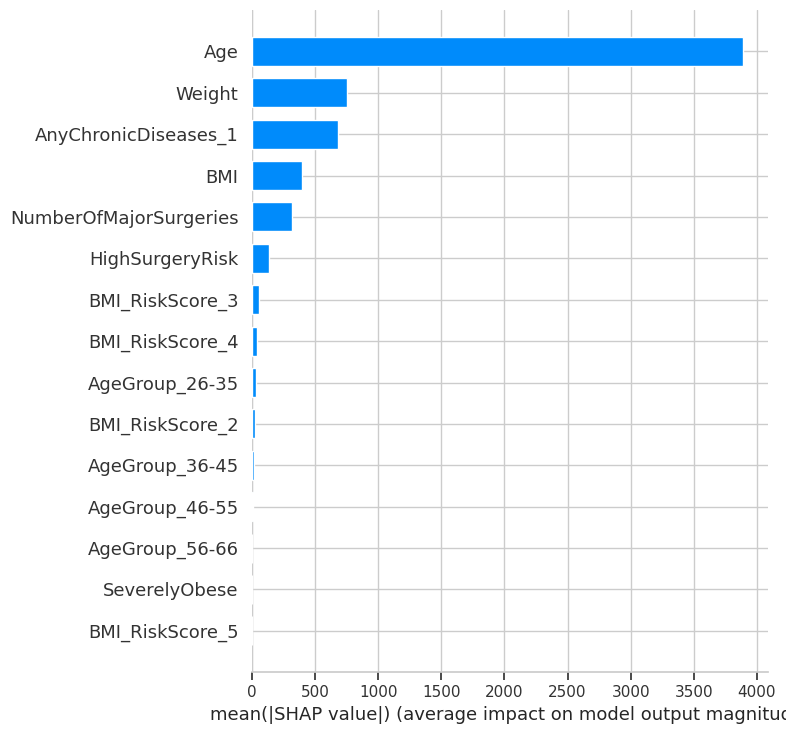

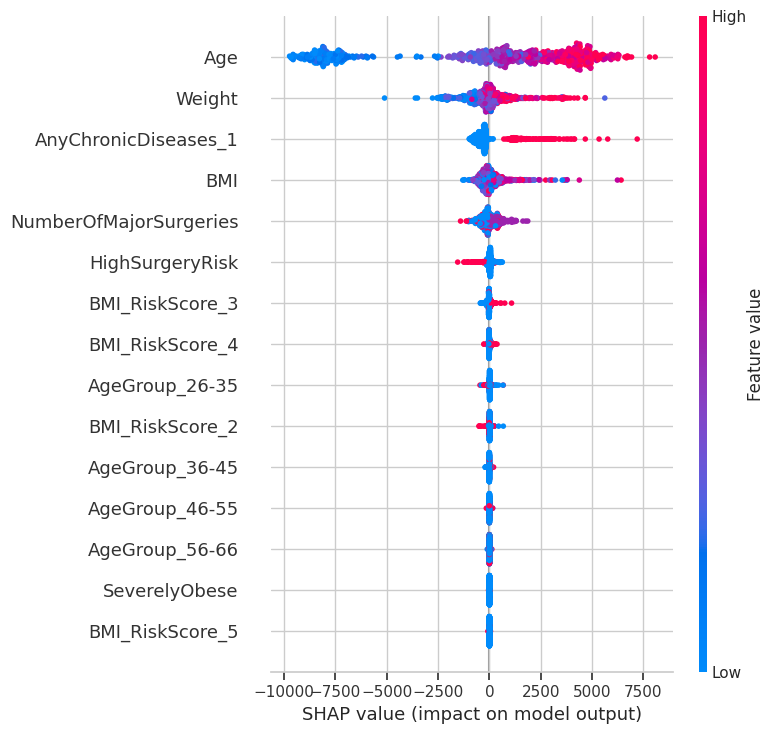

In [43]:
rf_model = final_pipeline.named_steps['model']
X_train_transformed = final_pipeline.named_steps['preprocessor'].transform(X_train)

# Get feature names
ohe = final_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
ohe_features = list(ohe.get_feature_names_out(categorical_features))
all_feature_names = numeric_features + ohe_features

# Permutation Importance
perm_importance = permutation_importance(rf_model, X_train_transformed, y_train, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()[::-1]

plt.figure(figsize=(8,6))
plt.barh([all_feature_names[i] for i in sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Mean Decrease in R²")
plt.title("Permutation Importance")
plt.gca().invert_yaxis()
plt.show()

# SHAP Values
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train_transformed)

shap.summary_plot(shap_values, X_train_transformed, feature_names=all_feature_names, plot_type='bar')
shap.summary_plot(shap_values, X_train_transformed, feature_names=all_feature_names)

# ===============================

# **Actionable Insights from the Analysis**

## 1. Demographics & Health Factors Drive Premium Prices
- **Age** and **BMI** emerged as significant predictors of insurance cost.
- Customers in higher **age brackets** and with **BMI in the “Obese” or “Severely Obese” categories** are associated with notably higher premiums.

**Action:**
- Offer **targeted wellness programs** for high-BMI individuals (e.g., gym discounts, dietician consultations) to reduce health risk and potentially lower claims.
- Introduce **age-tiered premium incentives** for preventive health check-ups.

---

## 2. Chronic Diseases and Surgery History Increase Risk
- Having **any chronic disease** and a **history of multiple major surgeries** significantly increases premium prices.
- The engineered **HighSurgeryRisk** feature was among the top contributors in Random Forest’s feature importance.

**Action:**
- Implement **disease management programs** (e.g., diabetes control, hypertension monitoring) to reduce claim frequency.
- For high-surgery-history customers, explore **specialized coverage plans** that balance premium cost with adequate coverage.

---

## 3. Model Performance Supports Predictive Pricing
- The **Random Forest model** achieved:
  - **R² ≈ 0.68** on the test set — good explanatory power for premium prediction.
  - **95% CI for R²** between **0.57–0.78**, suggesting stable generalization.

**Action:**
- Deploy the model in a **pricing simulation tool** for underwriting teams to adjust premiums based on incoming customer profiles.
- Monitor **model drift** quarterly to ensure ongoing accuracy.

---

## 4. BMI and Age Interactions Offer Cross-Sell Opportunities
- **SHAP analysis** showed that high BMI in older age groups drives the largest premium increases.

**Action:**
- Partner with health service providers to create **bundled health+insurance packages** for these high-risk customers.
- Offer **loyalty discounts** if health indicators improve over time.

---

## 5. Prediction Intervals Enable Risk-Based Underwriting
- The model’s **prediction intervals** can be used to flag cases with **wide uncertainty** in premium estimation.

**Action:**
- Route **high-uncertainty** cases for **manual underwriting review**.
- For **low-uncertainty**, automate pricing to speed up policy issuance.

---

## 6. Customer Segmentation Can Improve Retention
- Combining **AgeGroup**, **BMI_RiskScore**, and **Chronic Disease** status creates clear customer segments.

**Action:**
- Tailor **marketing messages** and **health benefit offerings** for each segment.
- *Example:* Younger, high-BMI customers might respond well to **fitness challenges** with premium discounts.


In [44]:
!pip show scikit-learn joblib


Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR